# Лабораторная работа №1
## Выполнили Максимов Артём и Смирнов Егор

Для анализа мы выбрали класс №9.В первую очередь мы посмотрели вопросы, на которые отвечали студенты. Было замечено, что часть вопросов очень похожа по своему смыслу, а значит ответы на них должны быть как-то связаны. Чтобы убедиться в этом мы построили матрицу корреляции между всеми 28 вопросами. Для удобства интерпретации информации мы визуализировали значения матрицы корреляции в цвете. 

Стоит отметить, что в данной лабораторной работе начало отсчета для всех графиков находится в левом-нижнем углу, поэтому главная диагональ матрицы - диагональ из левого-нижнего в правый-верхний угол, а не диагональ левый-верхний - правый-нижний угол, как в стандартном представлении матриц.

In [1]:
import numpy as np

filename = "data.csv"
data = np.genfromtxt(filename, delimiter=',', skip_header=True, dtype=np.int)
R = np.asarray([row for row in data if row[1] == 9])

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

R2 = np.corrcoef(R[:, 5:33].T)
R_questions = R[:,5:33]

fig, ax = plt.subplots(figsize=(6, 5), constrained_layout=True)
im = ax.pcolor(R2, cmap=cm.viridis, edgecolors='k', vmin=-1, vmax=1, linewidths=0.2)

fig.colorbar(im, ax=ax, aspect=80)
plt.show()

<Figure size 600x500 with 2 Axes>

После построения матрицы и представления ее в цвете видно, что вырисовыватся 2 светло-зеленых квадрата на более темном фоне. Этим квадратам соответсвуют 2 группы вопросов: 

- 1 - 10 (группа вопросов, в которой спрашивается про сам курс, его содержимое)

- 13 - 28(группа вопросов, которая направлена на то, чтобы определить компетентность преподавателя)

Вопросы 11-12 не попали в первую группу, хотя на первый взгляд они и связаны с курсом, потому что они более абстрактны, чем вопросы 1-10. В них спрашивается о мнении учащихся о пользе курса в профессиональном и личном плане. Ответы на эти вопросы никак не связаны с ответами на вопросы о содержимом курса. 

После была произведена очистка таблицы от "мусорных" данных.
К таким данным мы отнесли:

- Студентов из класса 9, которые дали одинаковые ответы на ВСЕ вопросы. Мы посчитали, что такие люди несерьезно отнеслись к прохождению теста и поэтому их мнение нам не интересно, так как оно "портит" данные.

- Студентов из класса 9, которые имеют attendancy == 0 при np.repeat == 1. Мы посчитали, что раз они вообще не посещали пары, то их ответы не показывают их реального мнения о курсе и работеля преподавателя. Студенты, имеющие attendancy == 0, но np.repeat != 0 присутсвуют в таблице. Предполагается, что у них, например, остались конспекты с предыдущих прохождений курса и именно поэтому они не ходили на пары.

In [27]:
X = []
for i in range(R.shape[0]):
    if np.unique(R[i, 5:33]).size != 1 and ((R[i, 3] != 0 and R[i, 2] == 1) or R[i, 2] != 1):
            X.append(R[i])
X = np.asarray(X)
X.shape

(224, 33)

После построения матрицы корреляций (и визуализации ее в цвете) для меньшего количества студентов(после чистки количество студентов уменьшилось с 571 до 224 человек) заметно уменьшение коэффициентов, но зависимость сохраняется и стала более явной. Мы посчитали, что данные стали "правдивее" и теперь меньше зависят друг от друга, в то время как общая тенденция сохраняется, как и должно быть. На основании этого мы сделали вывод, что очистка данных прошла успешно и теперь они лучше отражают действительность.

Визуализация матриц корреляции между вопросами до и после чистки данных:

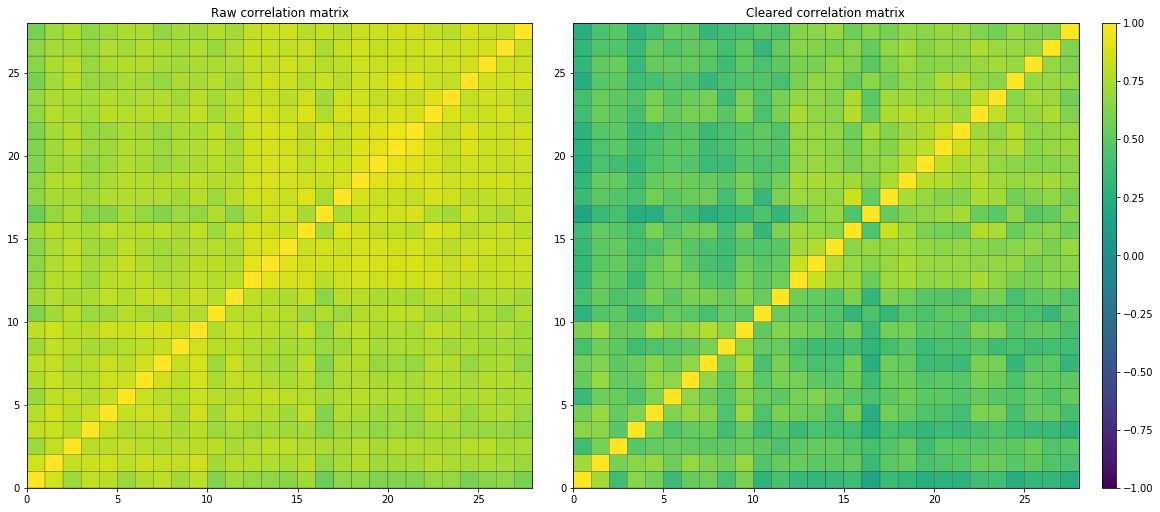

In [4]:
M = X[:, 5:33] #Вопросы
M2 = np.corrcoef(M.T)

arr = [R2, M2]
titles = ['Raw correlation matrix', 'Cleared correlation matrix']

fig, ax = plt.subplots(ncols=len(arr), figsize=(16, 7), constrained_layout=True)

for i in range(len(arr)):
    im = ax[i].pcolor(arr[i], cmap=cm.viridis, edgecolors='k', vmin=-1, vmax=1, linewidths=0.2)
    ax[i].set_title(titles[i])

fig.colorbar(im, ax=ax[-1], aspect=80)
plt.show()

 Также мы попробовали другой способ очистки данных - поиск расстояния Махаланобиса между медианой ответов очеников на все вопросы и ответами каждого конкретного ученика. Медиана была выбрана для того, чтобы не учитывать крайние значения, так как они могут немного сдвинуть среднее значение. 
    
Функция для построения графика дистанции:

In [5]:
avg = np.median(R_questions)

In [6]:
def plotMahalanobis(Matrix, color):
    VI = np.linalg.pinv(np.cov(Matrix.T))#Moore–Penrose inv coz it doesn't affect Mahalanobis dist but always exists
    y = [np.sqrt(np.dot(np.dot((curr - avg), VI), (curr - avg).T)) for curr in Matrix]

    plt.figure(figsize=(25, 7))
    plt.ylim((0, 15))
    plt.plot(range(Matrix.shape[0]), y, color)
    plt.xlabel('Students')
    plt.ylabel('Mahalanobis distance')
    plt.show()

Графики студентов от расстояния Махаланобиса для сырой(красным) и очищенной(синим) матриц:

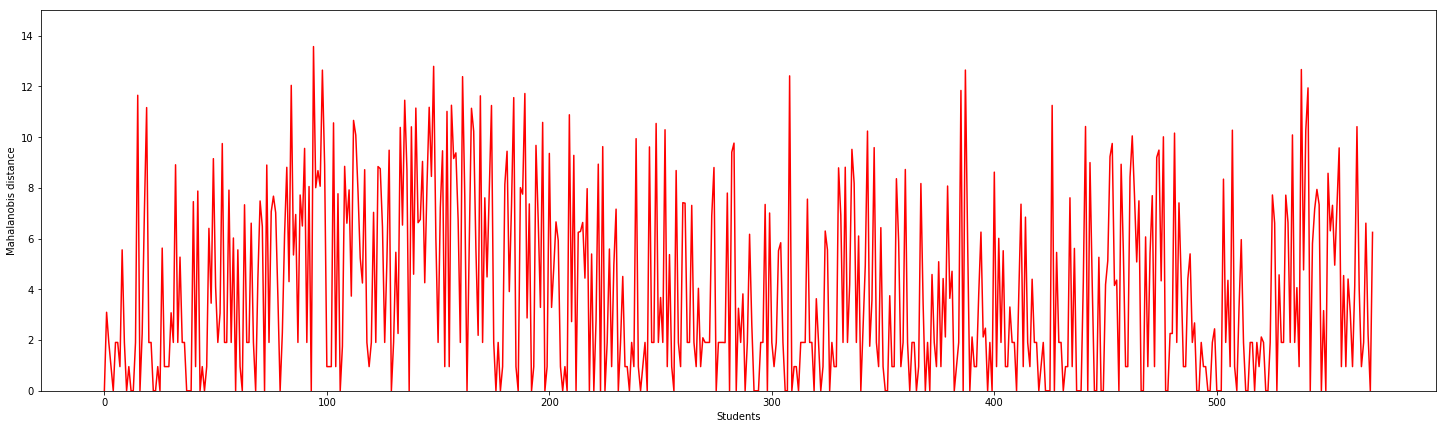

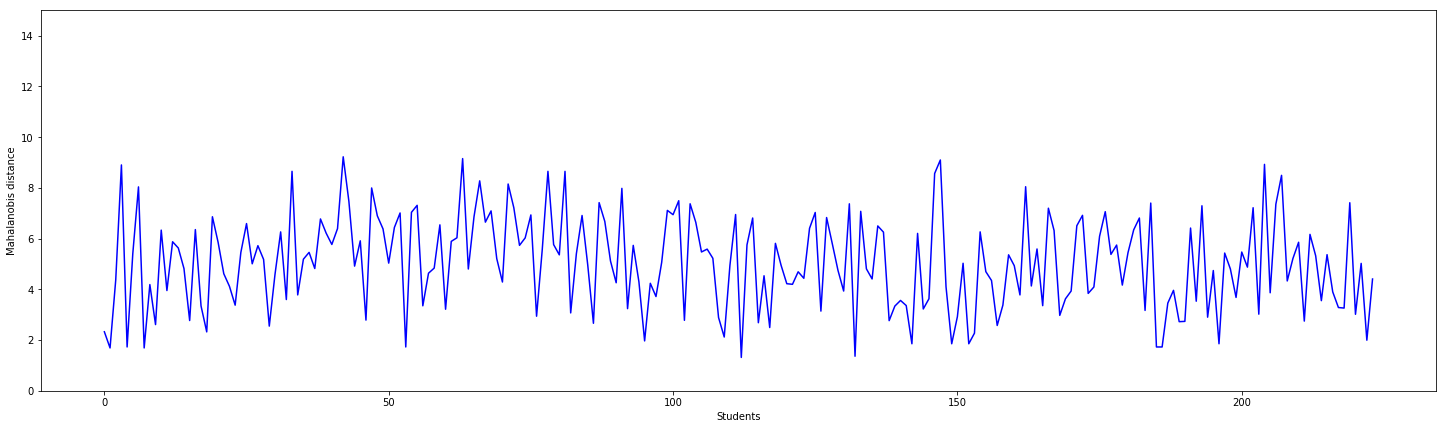

In [7]:
plotMahalanobis(R_questions, 'r')
plotMahalanobis(M, 'b')

Как видно, что на очищенных данных расстояние Махаланобиса стало меньше, что должно говорить о том, что данные стали ближе к среднему значению, чем были раньше. Однако, на всей таблице данных этот метод не работал, так что, возможно, мы неправильно интерпретируем данные и метод на самом деле не работает. При детальном рассмотрении выяснилось, что определитель матрицы ковариаций для сырых данных равен нулю(Из-за чего и пришлось использовать метод Мура-Пенроуза обращения матрицы), что могло повлиять на результаты.

После, мы сделали попытку связать такие величины как np.repeat, attendancy и difficulty, так как это кажется логичным и человек прошедший курс с первого раза вряд ли станет ставить высокий балл в оценке сложности курса. Матрица корреляции:

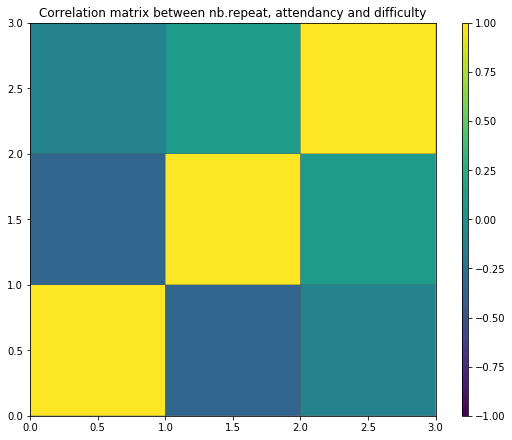

In [9]:
Q = X[:, 2:5]
Q2 = np.corrcoef(Q.T)

fig, ax = plt.subplots(figsize=(7, 6), constrained_layout=True)
im = ax.pcolor(Q2, cmap=cm.viridis, edgecolors='k', vmin=-1, vmax=1, linewidths=0.2)
ax.set_title('Correlation matrix between nb.repeat, attendancy and difficulty')

fig.colorbar(im, ax=ax, aspect=80)
plt.show()

Однако , но на данных класса 9 это ничего не дало - матрица корреляции между этими величинами не показала сильной зависимости между величинами. Поэтому мы ршили просто узнать насколько сложным студенты оценили курс и за сколько попыток они его прошли. Эти данные показаны на круговых диаграммах ниже:

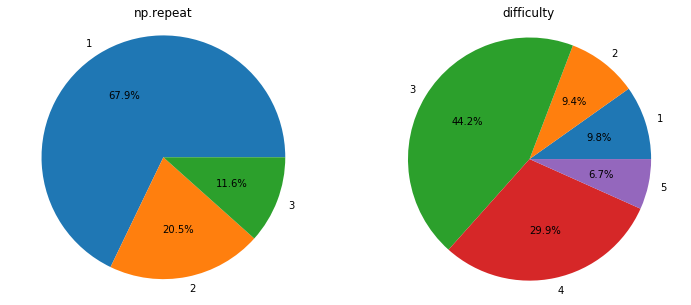

In [10]:
fig1, ax = plt.subplots(ncols=2, figsize=(12, 5))

arr=[X[:, 2], X[:, 4]]
titles=['np.repeat', 'difficulty']

for i in range(2):
    ax[i].pie(np.unique(arr[i], return_counts=True)[1], labels=np.unique(arr[i]), autopct='%1.1f%%')
    ax[i].axis('equal')
    ax[i].set_title(titles[i])

plt.show()

Также мы нашли средние значения этих величин:

In [11]:
repeat_mean = np.mean(X[:,2])
difficulty_mean = np.mean(X[:,4])


Несмотря на то, что прямой зависимости, как было показано выше, нет можно заметить, что большинство студентов класса 9 посчитали предмет нормальным для понимания, тк средняя сложность на наших данных равна 3.14. В среднем, студенты проходили этот курс 1.44 раз, но можно заметить, что более 67% прошли его с первого раза. 

Далее были найдены математические ожидания в каждом из столбцов, представляющих вопросы. Все значения держатся в районе 3, то есть студенты отвечали на вопросы средними оценками и нет такого, что абсолютно всем понравился или не понравился предмет или работа инструктора. Эти данные говорят о том, что это "обычный" класс и "обычный" преподаватель. Нет никаких отклонений в лучшую или худшую сторону.

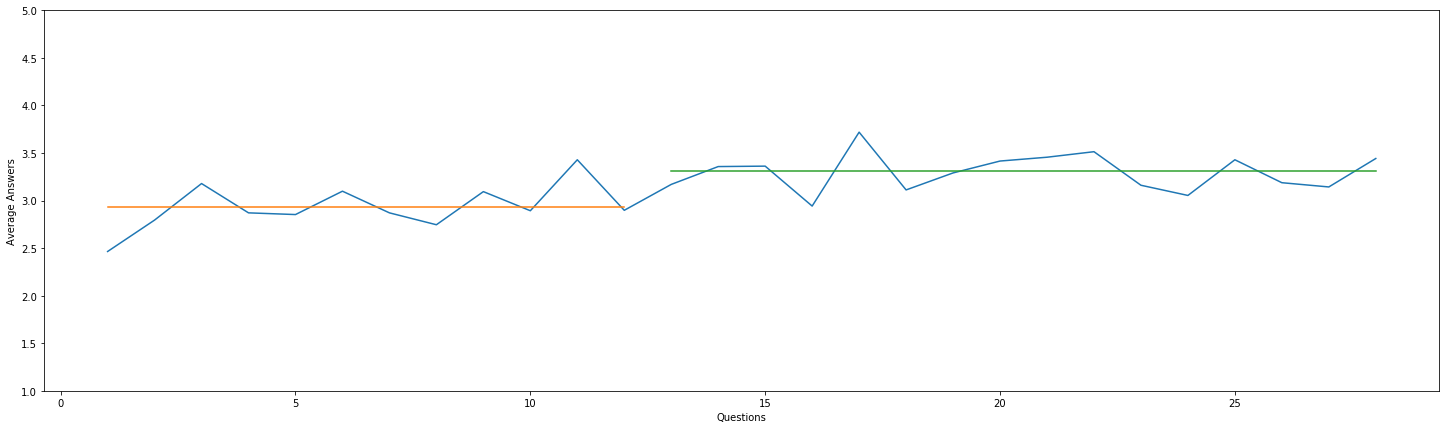

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 7))
means = [np.mean(X[:, j]) for j in range(5, 33)]

plt.ylim((1, 5))
plt.plot(range(1, 29), means)

plt.plot(range(1, 13), np.ones(12)*np.mean(means[0:12]))
plt.plot(range(13, 29), np.ones(16)*np.mean(means[13:]))

plt.xlabel('Questions')
plt.ylabel('Average Answers')
plt.show()

Стоит отметить максимальное и минимальное математические ожидания, соответствующие 17 и 1 вопросам соответсвенно. Исходя из этих данных можно сделать следующие выводы: 

- "Содержимое курса, методы обучения и оценивания" (Вопрос 1) были даны студентам НЕ с начала прохождения курса. Cредний ответ на этот вопрос - 2.46.

- "Преподаватель всегда был на парах вовремя" (Вопрос 17). Cредний ответ на этот вопрос - 3.72.

Также заметно, что, в среднем, ответы на вопросы о преподавателе (13-28 вопросы) выше, чем на вопрсы о курсе (1-12 вопросы). Это видно по оранжевой (среднее значение для 1-12 вопросов) и зеленой(среднее значение для 13-28 вопросов) линиям на графике выше. Исходя из этих данных местный деканат может сделать вывод, что студентам не очень нравится сам предмет(может быть он им не очень нужен для профессионального роста или сам по себе скучен), в то же время работа инструктора устраивает студентов, кроме, может быть, вопроса 16, который имеет самый низкий балл среди всех вопросов о преподавателе - 2.94. Вероятно, имеет смысл попросить инструктора стараться быть более понятным для студентов. 

Так как все вопросы даны в "положительной" формулировке, то есть нет вопросов вида: "Инструктор давал материал НЕ хорошо", то, на наш взгляд, среднее значение среди средних значений может показывать отношение студентов к курсу. Чтобы не учитывать крайние значения, которые могли остаться после чистки данных, и/или могут быть связаны с личным отношением (как хорошим, так и плохим) студентов к учителю воспользуемся медианой по математическим ожиданиям вопросов:

In [13]:
print("%0.4f" % np.median(means))

3.1518


Это значение больше средней оценки - 3, то есть в среднем студентам курс (и материал, и работа преподавателя) больше понравился, чем нет. 

In [14]:
print("%0.4f" % np.mean(means))

3.1406


Также стоит отметить, что значение медианы больше значения математического ожидания по математическим ожиданиям вопросов, то есть среди крайних значений больше низких баллов. Это не несет какой-то практической информации, так как может быть связано как с личными отношениями между студентами и преподавателем, так и с мнением большого количества студентов, что сам предмет мог бы быть лучше.

Чтобы оценить, насколько разные ответы давали студенты, обратим внимание на медиану стандартного отклонение по вопросам:

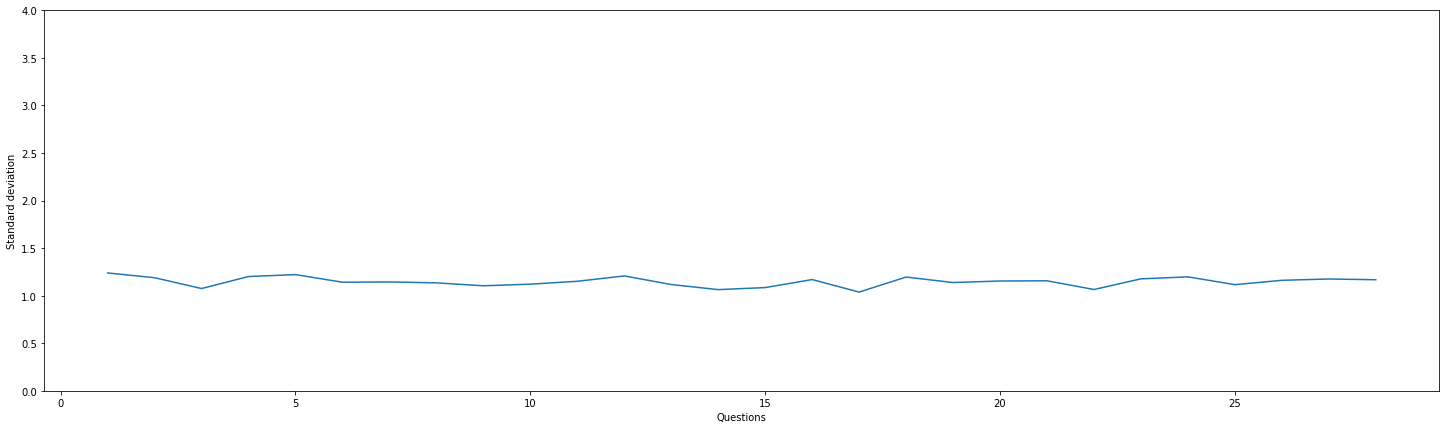

In [15]:
plt.figure(figsize=(25, 7))
plt.plot(range(1, 29), np.std(M, axis = 0))
plt.ylim((0, 4))
plt.xlabel('Questions')
plt.ylabel('Standard deviation')
plt.show()

Как можно заметить, в целом, ответы студентов на одинаковые вопросы отличаются не более чем на 1 пункт, то есть вся группа солидарна в своем мнении и нет каких-то индивидов, мнение которых сильно отличается от мнения большинства.

Подводя итог, мы:

- Провели анализ вопросов, выделили в нем несколько групп и подтвердили свои предположения с помощью матрицы корреляции

- Произвели очистку данных исходя из логических соображений

- Попытались убедиться в том, что очистка улучшила наши данные с помощью расстояния Махаланобиса, но не смогли сделать вывод из-за того, что не понимаем до конца как интерпретировать полученные результаты

- Произвели анализ связи между количеством попыток, сложностью курса и посещаемостью студентов, но не нашли прямой/обратной связей

- Определили средние ответы студентов и сделали выводы исходя из полученных значений

- Определили, что вцелом студенты имеют одно мнение касательно курса и работы преподавателя